In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
data = {}
data_flow = {}

id = 10
for filename in os.listdir('../logs/'):
    if filename[-3:] == 'csv':
        np_read = np.loadtxt(f'../logs/{filename}', delimiter=',', dtype=float)
        np_read[:, 0] -= np_read[0, 0]

        pump_on = np.argmax(np_read[:, 4] > 0)

        if pump_on > 0:
            pump_off = len(np_read) - np.argmax(np.flip(np_read[pump_on:, 4]) > 0)

            no_flow_1 = np_read[:pump_on]

            flow = np_read[pump_on:pump_off].copy()
            flow[:, 0] -= flow[0, 0]

            no_flow_2 = np_read[pump_off:].copy()
            no_flow_2[:, 0] -= no_flow_2[0, 0]

            data[id] = {
                "t": no_flow_1[:, 0],
                "u": no_flow_1[:, 3],
                "T": no_flow_1[:, 1],
                "P": no_flow_1[:, 2],
                "h": no_flow_1[:, 4]
            }

            data_flow[id] = {
                "t": flow[:, 0],
                "u": flow[:, 3],
                "T": flow[:, 1],
                "P": flow[:, 2],
                "h": flow[:, 4]
            }

            data[id + 100] = {
                "t": no_flow_2[:, 0],
                "u": no_flow_2[:, 3],
                "T": no_flow_2[:, 1],
                "P": no_flow_2[:, 2],
                "h": no_flow_2[:, 4]
            }
        else:
            data[id] = {
                "t": np_read[:, 0],
                "u": np_read[:, 3],
                "T": np_read[:, 1],
                "P": np_read[:, 2],
                "h": np_read[:, 4]
            }


        id += 1

IndexError: index 0 is out of bounds for axis 0 with size 0

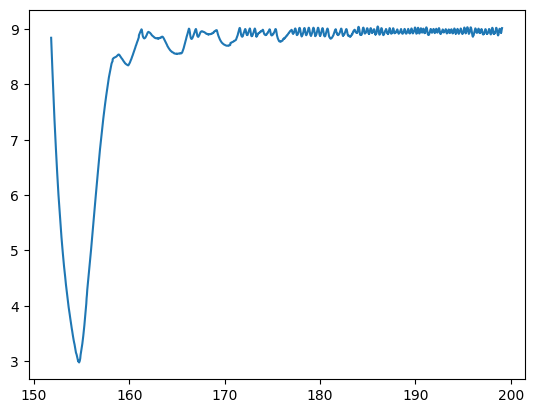

In [11]:
plt.plot(recent_data[pump_on:pump_off, 0], recent_data[pump_on:pump_off, 2])
plt.show()

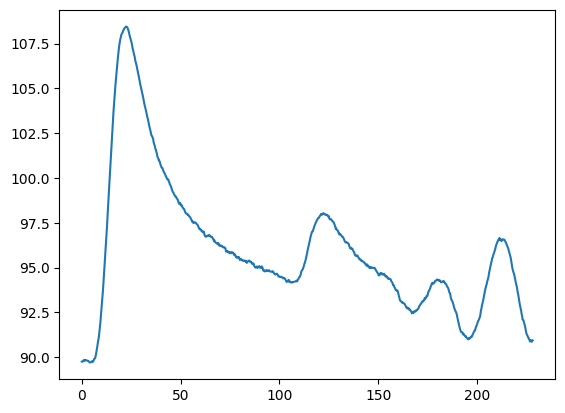

In [12]:
plt.plot(recent_data[:, 0], recent_data[:, 1])
plt.show()